# IMPORT ALL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from tkinter import *
import joblib

In [2]:
data = pd.read_csv('sleep_health.csv')

In [3]:
data.head(10)

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   
5                 4                       30             8        Obese   
6                 6                       40             7        Obese   
7                 7                       75             6       Normal   
8                 7                       75             6       Normal   
9                 7                       75             6       Normal   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea  
5         140/90          85         3000       Insomnia  
6         140/90          82         3500       Insomnia  
7         120/80          70         8000            NaN  
8         120/80          70         8000            NaN  
9         120/80          70         8000            NaN

In [4]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
data.shape

(374, 13)

In [6]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [7]:
data.drop(['Person ID'],axis=1,inplace=True)


In [8]:
#data.drop(['Blood Pressure'],axis=1,inplace=True)

In [9]:
data.shape

(374, 12)

In [10]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [11]:
#data['Sleep Disorder'].replace({'Sleep Apnea':0,'Insomnia':1},inplace=True)

In [12]:
data['Sleep Disorder'].fillna('Normal',inplace=True,axis=0)

In [13]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [15]:
#Basic statistical values for string columns
data.describe(include='O')

Gender Occupation BMI Category Blood Pressure Sleep Disorder
count     374        374          374            374            374
unique      2         11            4             25              3
top      Male      Nurse       Normal         130/85         Normal
freq      189         73          195             99            219

In [16]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Normal         219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [17]:
data.head()

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200         Normal  
1          75        10000         Normal  
2          75        10000         Normal  
3          85         3000    Sleep Apnea  
4          85         3000    Sleep Apnea

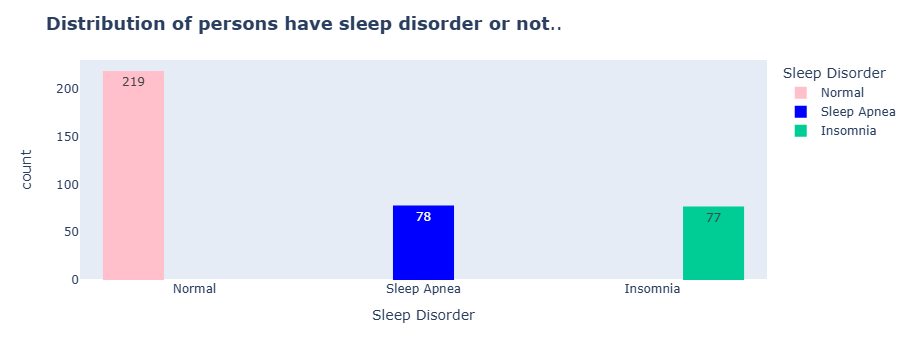

In [18]:
fig=px.histogram(data,x='Sleep Disorder', 
                 barmode="group",color='Sleep Disorder',
                 color_discrete_sequence=['pink','blue','light blue'],
                 text_auto=True)
 
    
fig.update_layout(title='<b>Distribution of persons have sleep disorder or not</b>..',
                 title_font={'size':18},
                 showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()


### note:: Normal people make up the majority with 58.6%

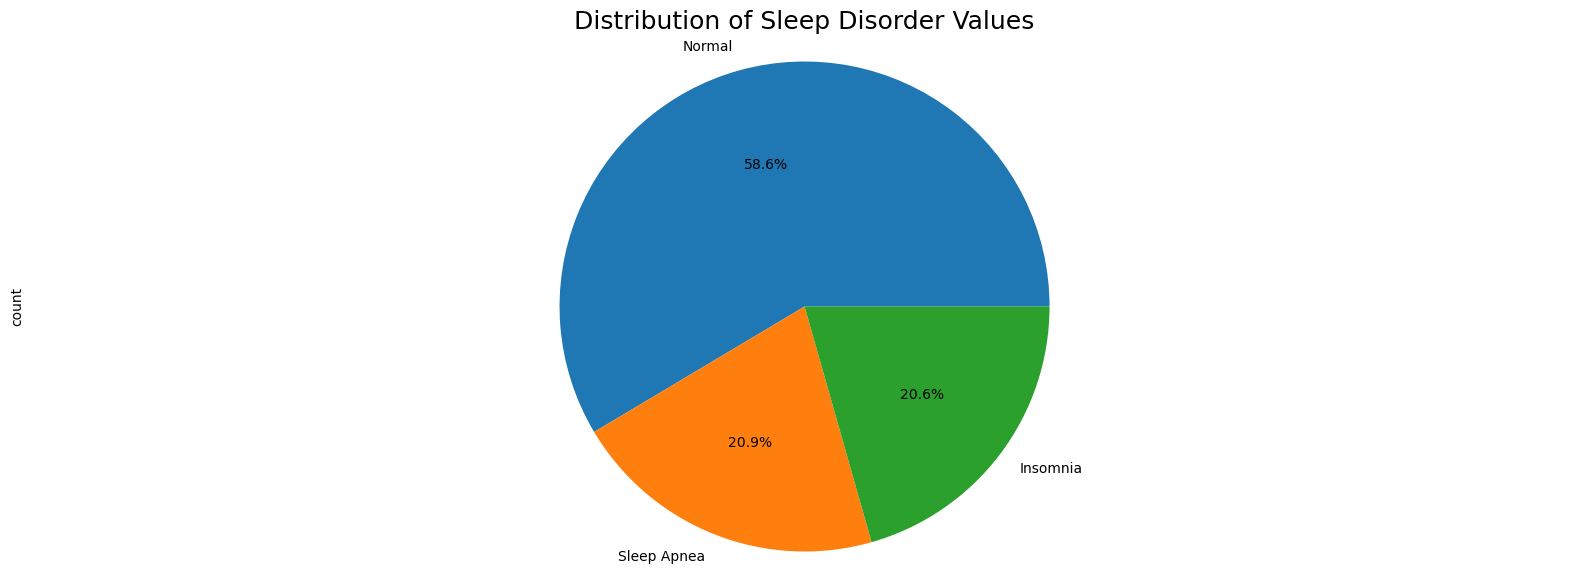

In [19]:
#plt.pie(x=data['Sleep Disorder'].value_counts(),autopct ='%1.1f%%')
data['Sleep Disorder'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(20,7))
plt.title('Distribution of Sleep Disorder Values',fontdict={'size':18})
plt.axis('equal')
plt.show()

In [20]:
data.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
Normal          Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

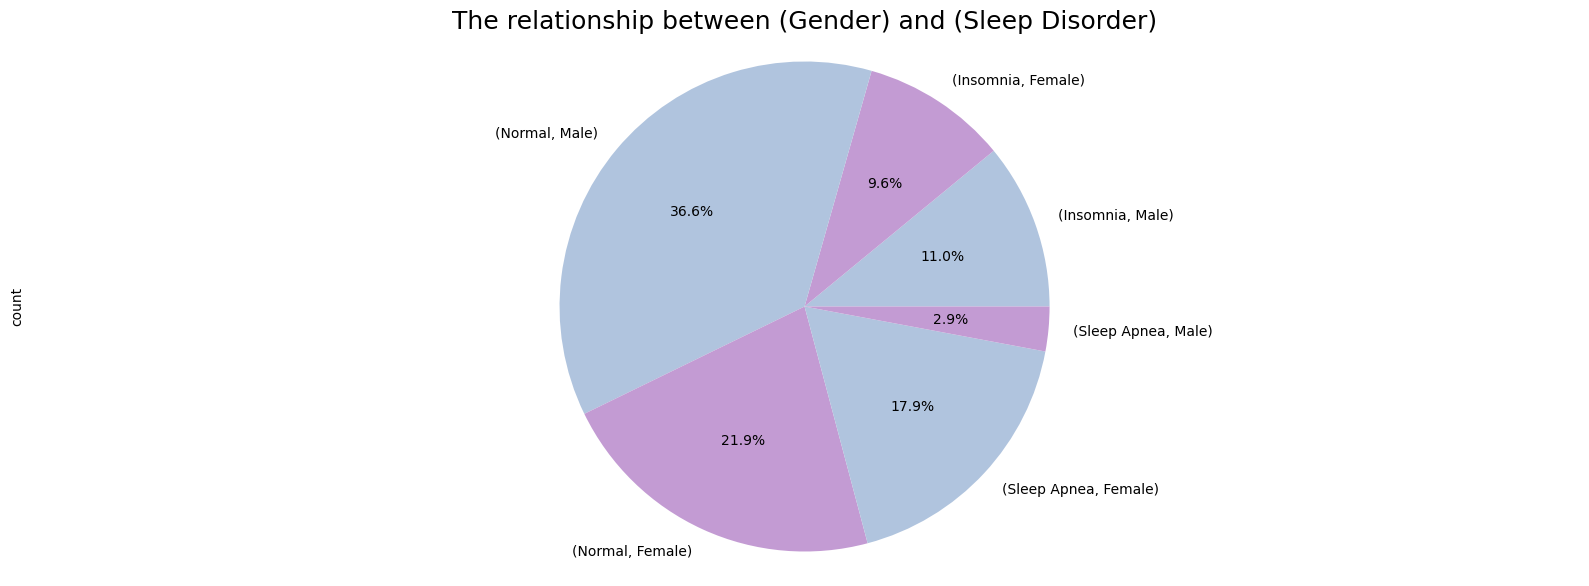

In [21]:
#Sleep Disorder for Gender breakdown
data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(20,7),
colors=['lightsteelblue','#C39BD3','lightsteelblue','#C39BD3','lightsteelblue', '#C39BD3'])
plt.title('The relationship between (Gender) and (Sleep Disorder)',fontdict={'size':18})
plt.axis('equal')
plt.show()

### note::
- Among normal individuals, men outnumber women.
- In sleep apnea, women outnumber men among individuals.
- In insomnia, men outnumber women among individuals.

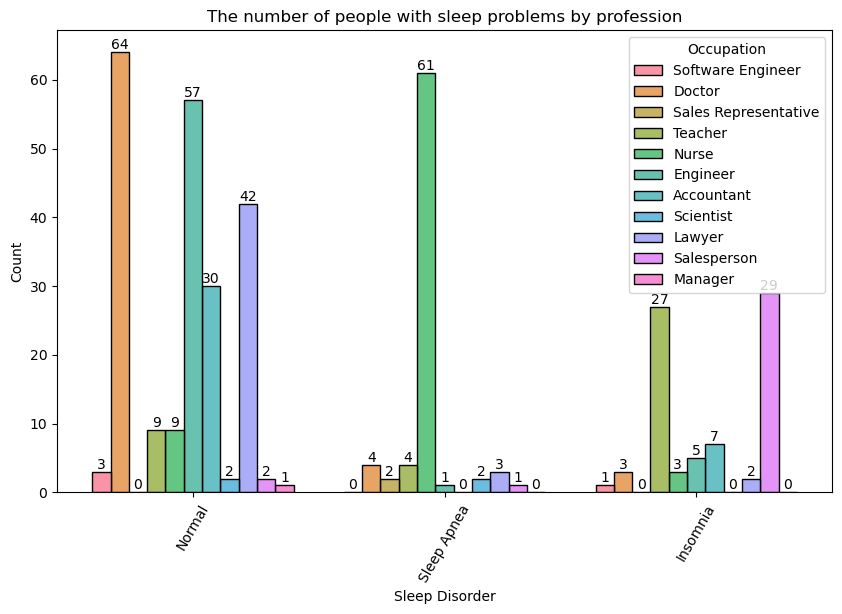

In [22]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=data, x="Sleep Disorder", hue='Occupation', multiple="dodge",shrink=.8)
plt.title("The number of people with sleep problems by profession")
plt.xticks(rotation=60)
for i in ax.containers:
        ax.bar_label(i)
plt.show()

### note::
1. Among normal individuals, doctors are in the majority.
2. In sleep apnea, nurses the majority among individuals.
3. In insomnia, salesperson and teachers take the lead among individuals.

In [23]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [24]:
data['Sleep Duration']

0      6.1
1      6.2
2      6.2
3      5.9
4      5.9
      ... 
369    8.1
370    8.0
371    8.1
372    8.1
373    8.1
Name: Sleep Duration, Length: 374, dtype: float64

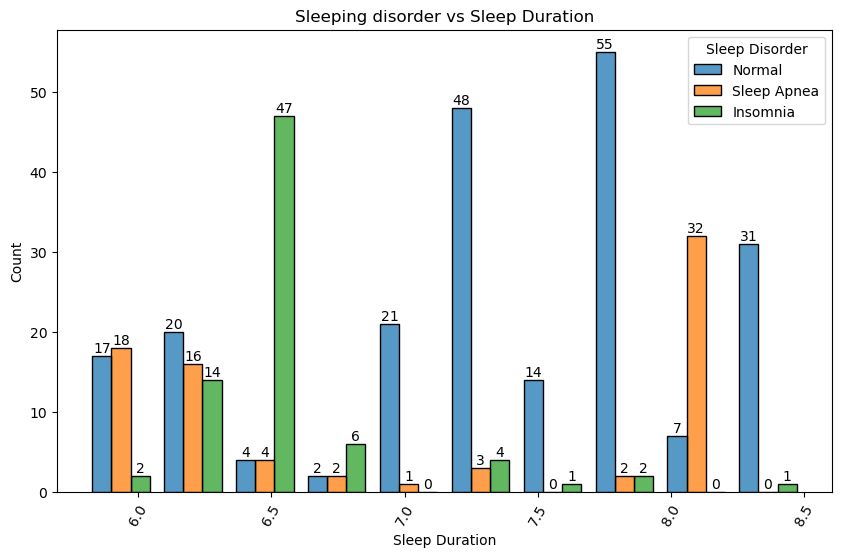

In [25]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=data, hue="Sleep Disorder", x='Sleep Duration', multiple="dodge",shrink=.8)
plt.title("Sleeping disorder vs Sleep Duration")
plt.xticks(rotation=60)
for i in ax.containers:
        ax.bar_label(i)
plt.show()

### note:
1. with increase in sleeping duration the insomnia and sleep apnea problem is decreasing

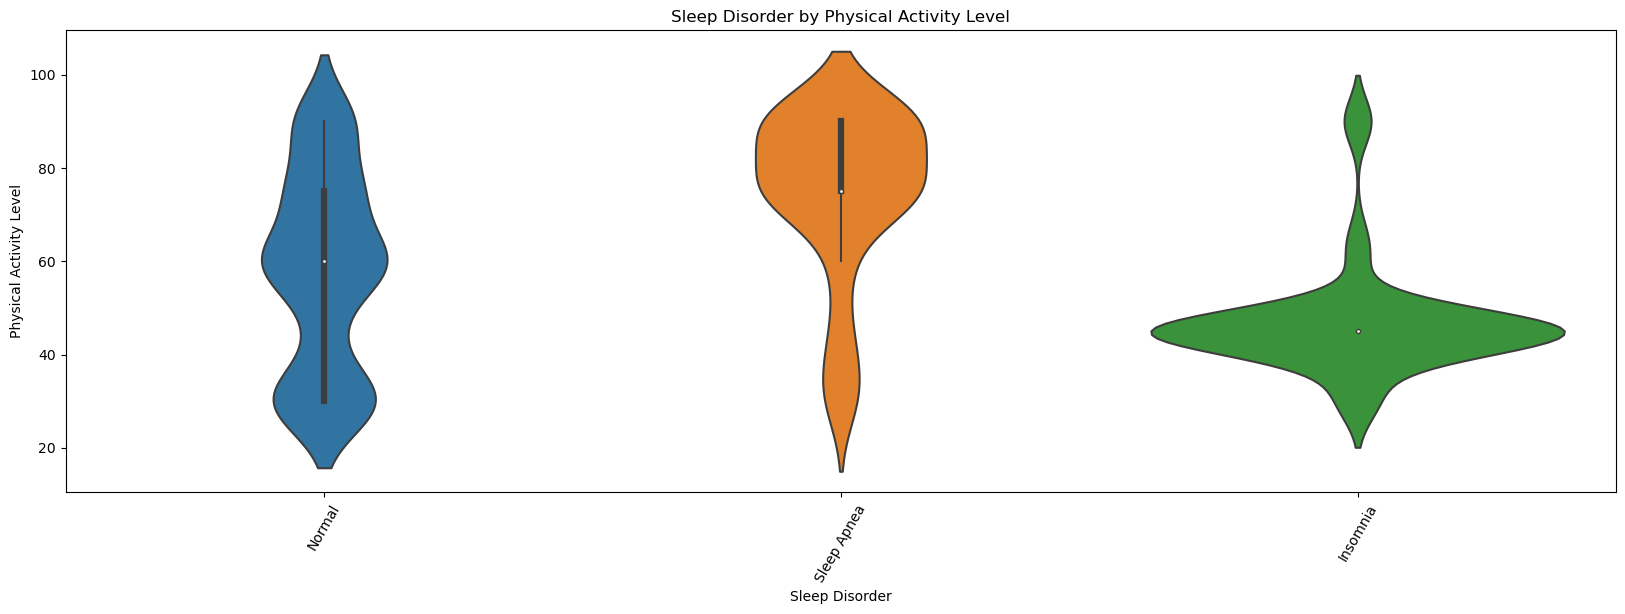

In [26]:
plt.figure(figsize=(20,6))
ax = sns.violinplot(data=data, x="Sleep Disorder", y='Physical Activity Level')
plt.title("Sleep Disorder by Physical Activity Level")
plt.xticks(rotation=60)
plt.show()

### note:
1. In individuals normal group of sleep disorders, the distribution of physical activity is balanced.
2. In individuals with sleep disorders, in those with sleep apnea, the distribution of physical activity concentrates at high values, while in individuals with insomnia, the distribution of physical activity centralizes at low values.

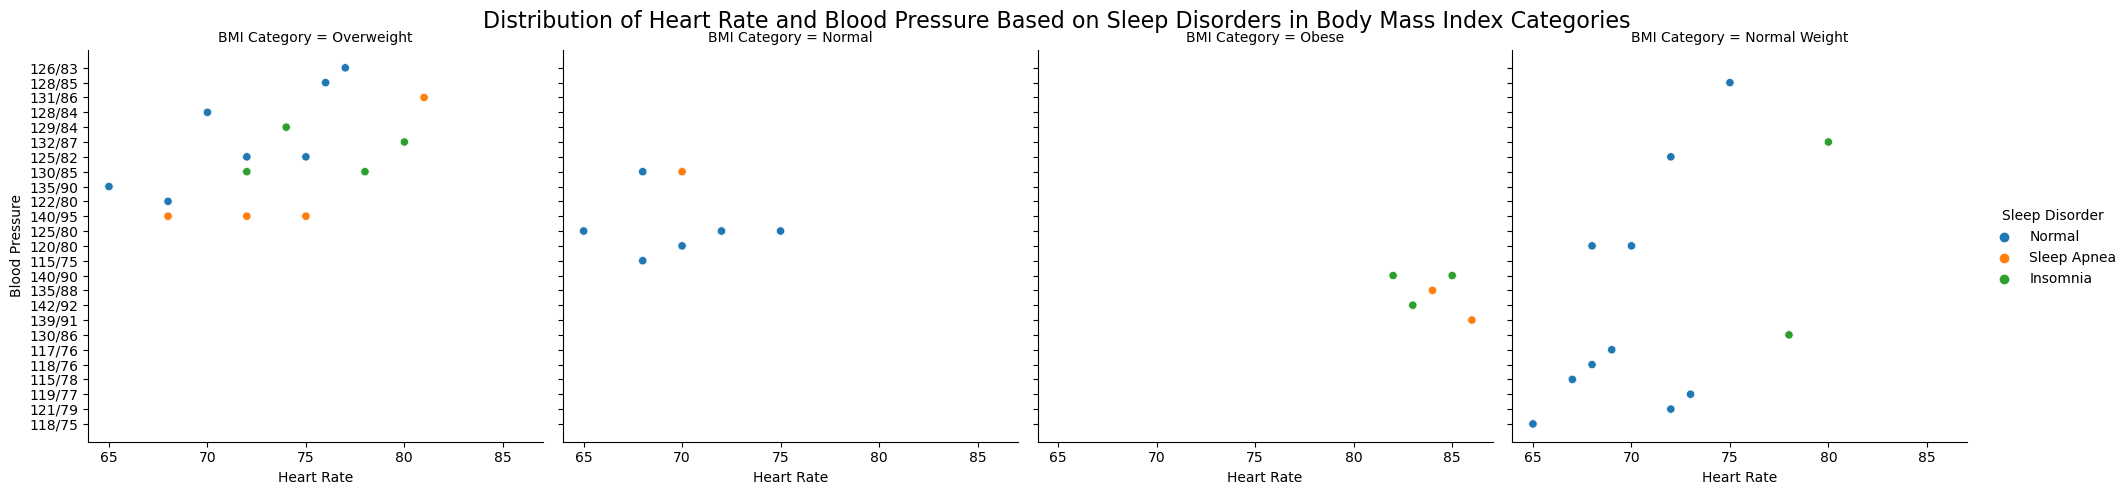

In [27]:
g = sns.relplot(
    data=data, x='Heart Rate', y='Blood Pressure',
    col='BMI Category', hue="Sleep Disorder",   kind="scatter")
g.fig.suptitle('Distribution of Heart Rate and Blood Pressure Based on Sleep Disorders in Body Mass Index Categories', fontsize=16)
g.fig.subplots_adjust(top=0.9);
plt.show()

### note::
1. Sleep apnea and insomnia are more common in individuals who are obese and overweight.
2. In individuals with above-normal weight, as heart rate and blood pressure increase, the condition is normal for sleep disorders, but with these increased values, the conditions are seen as either sleep apnea or insomnia. The increase in these values may be influencing this situation.
3. All obese individuals have either sleep apnea or insomnia, with blood pressure generally lower according to the overall distribution, but their heart rates are in the range of 80-85.
4. In individuals with normal weight, insomnia is observed in those with a heart rate above 75.

In [28]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [29]:
data['Blood Pressure'].value_counts()

Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64

In [30]:
data['Blood Pressure']=data['Blood Pressure'].apply(lambda x : 'low' if int(x.split("/")[0])<120 and int(x.split("/")[1])<80 else\
                            'normal' if (int(x.split("/")[0])>=120 and int(x.split("/")[0])<=129) and (int(x.split("/")[1])>=80 and int(x.split("/")[1])<=84)\
                            else 'high')

In [31]:
data['Blood Pressure'].value_counts()

Blood Pressure
high      212
normal    121
low        41
Name: count, dtype: int64

In [32]:
num_col = data.select_dtypes(include='number').columns.to_list()
cat_col = data.select_dtypes(exclude='int').columns.to_list()

In [33]:
cat_col

['Gender',
 'Occupation',
 'Sleep Duration',
 'BMI Category',
 'Blood Pressure',
 'Sleep Disorder']

# outlier detection

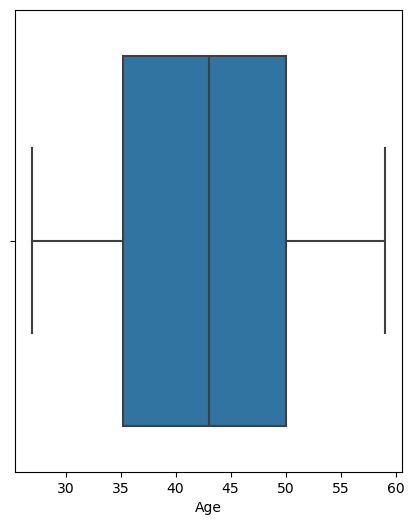

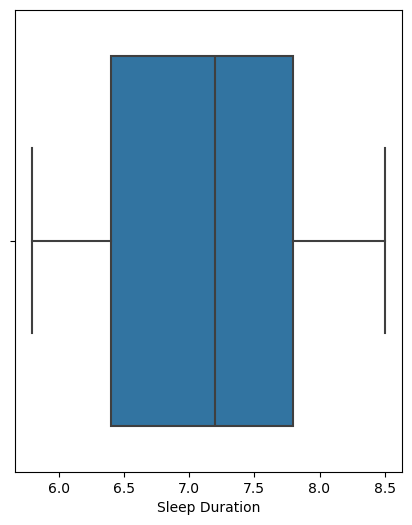

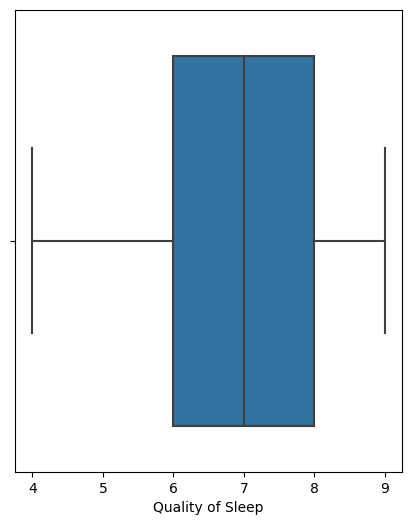

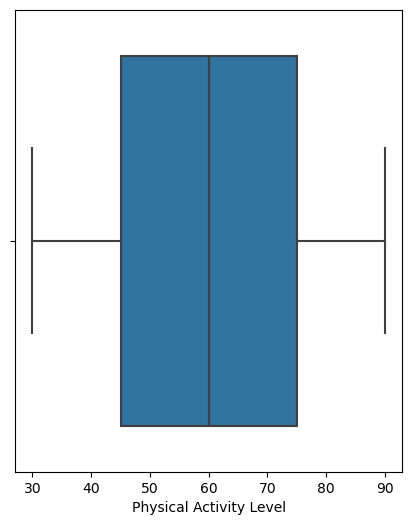

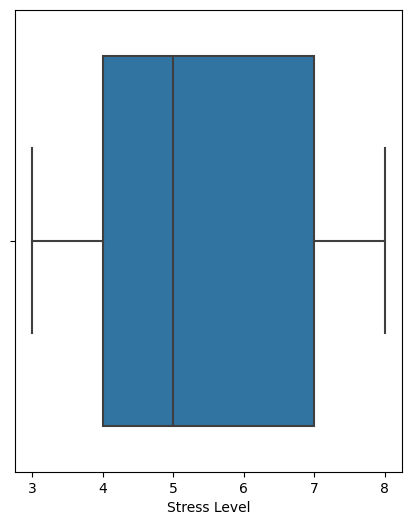

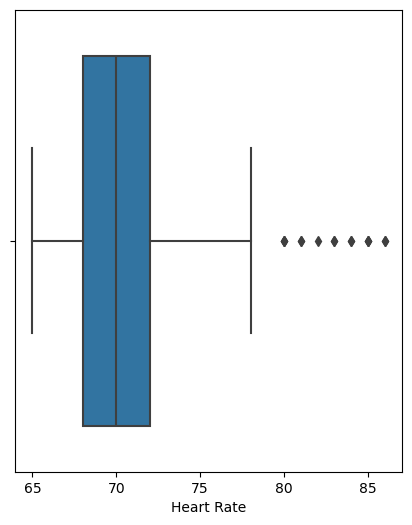

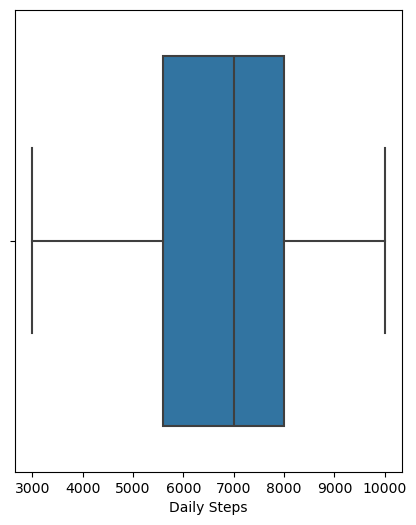

In [34]:
for col in num_col:
    plt.figure(figsize=(5,6))
    sns.boxplot(data=data, x= col)

In [35]:
data.head()

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         normal   
1                       60             8       Normal         normal   
2                       60             8       Normal         normal   
3                       30             8        Obese           high   
4                       30             8        Obese           high   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200         Normal  
1          75        10000         Normal  
2          75        10000         Normal  
3          85         3000    Sleep Apnea  
4          85         3000    Sleep Apnea

In [36]:
le  = LabelEncoder()

In [37]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [38]:
data.head()

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9               3                 6   
1       1   28           1               4                 6   
2       1   28           1               4                 6   
3       1   28           6               1                 4   
4       1   28           6               1                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             3               2   
1                       60             8             0               2   
2                       60             8             0               2   
3                       30             8             2               0   
4                       30             8             2               0   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77         4200               1  
1          75        10000               1  
2          75        10000               1  
3          85         3000               2  
4          85         3000               2

In [39]:
data['Blood Pressure'].value_counts()

Blood Pressure
0    212
2    121
1     41
Name: count, dtype: int64

#### note:
- 0 : high
- 2 : normal
- 1 : low

In [40]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

#### note:
- 1 : Normal 
- 2: Sleep Apnea 
- 0: Insomnia

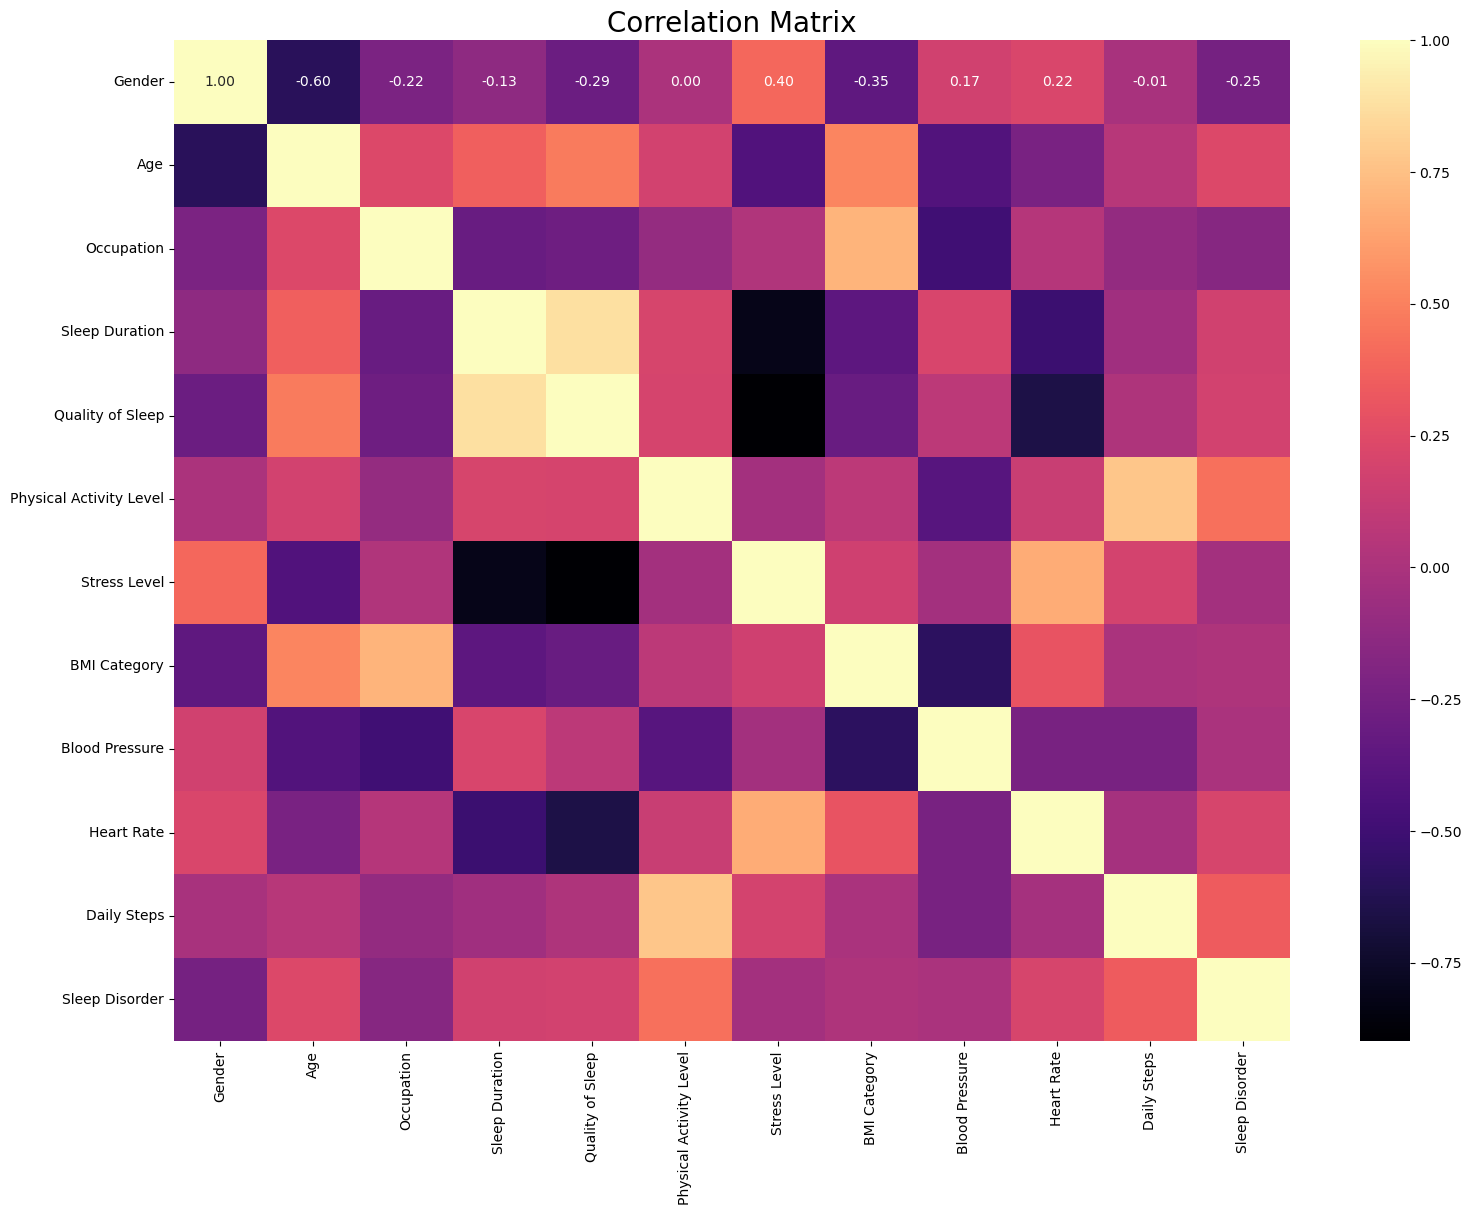

In [41]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Data Spliting

In [42]:
y = data["Sleep Disorder"]
X = data.drop(["Sleep Disorder"], axis=1)

In [43]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [44]:
print('The dimensions of x is : ',X.shape)
print('The dimensions of y is : ',y.shape)

The dimensions of x is :  (374, 11)
The dimensions of y is :  (374,)


In [45]:
lr= LogisticRegression(multi_class='multinomial')
lr.fit(X_train,y_train)



LogisticRegression(multi_class='multinomial')

In [46]:
# Prediction
y_pred= lr.predict(X_test)


In [47]:
lr.predict_proba(X_test)

array([[3.82669053e-03, 9.73683533e-01, 2.24897768e-02],
       [9.70020652e-02, 2.71118441e-01, 6.31879494e-01],
       [4.30056860e-02, 7.59782544e-01, 1.97211770e-01],
       [9.98194050e-02, 1.23582780e-01, 7.76597815e-01],
       [1.16276521e-02, 9.67082176e-01, 2.12901719e-02],
       [4.07389738e-04, 9.96523479e-01, 3.06913147e-03],
       [2.12684218e-02, 9.58117474e-01, 2.06141037e-02],
       [6.50087113e-01, 1.99188914e-01, 1.50723974e-01],
       [1.44987173e-01, 8.39871588e-01, 1.51412385e-02],
       [2.48244215e-01, 7.28876152e-01, 2.28796330e-02],
       [2.29823439e-02, 9.36896975e-01, 4.01206808e-02],
       [3.82669053e-03, 9.73683533e-01, 2.24897768e-02],
       [3.35230074e-01, 6.34952876e-01, 2.98170496e-02],
       [1.43678634e-02, 9.59788405e-01, 2.58437313e-02],
       [2.29823439e-02, 9.36896975e-01, 4.01206808e-02],
       [1.51509171e-02, 9.57442107e-01, 2.74069762e-02],
       [1.38365266e-01, 8.47266622e-01, 1.43681127e-02],
       [1.87782113e-01, 7.55715

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


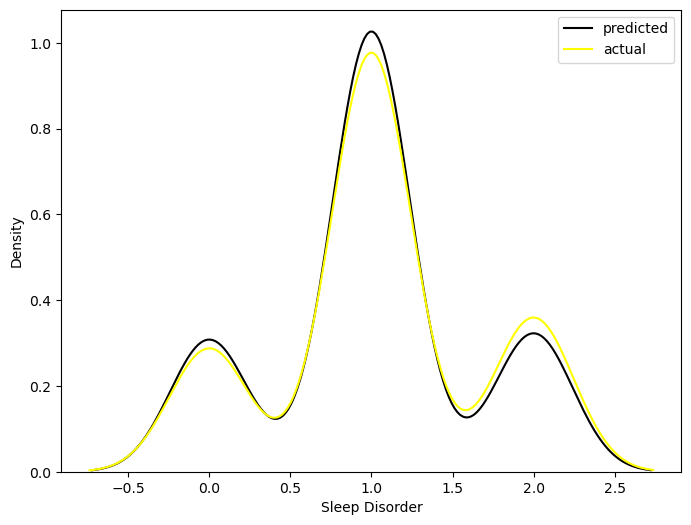

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
print(sns.kdeplot(y_pred,color='black',label='predicted',ax=ax))
print(sns.kdeplot(y_test,color='yellow',label='actual',ax=ax))
plt.legend()
plt.show()


In [49]:
#Accuracy
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Classification_Report: ", classification_report(y_pred,y_test))
print("Confusion_Matrix",confusion_matrix(y_pred,y_test))

Accuracy:  0.9380530973451328
Classification_Report:                precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.99      0.96      0.97        70
           2       0.84      0.95      0.89        22

    accuracy                           0.94       113
   macro avg       0.91      0.92      0.91       113
weighted avg       0.94      0.94      0.94       113

Confusion_Matrix [[18  0  3]
 [ 2 67  1]
 [ 0  1 21]]


In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
# Prediction
y_pred1= knn.predict(X_test)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


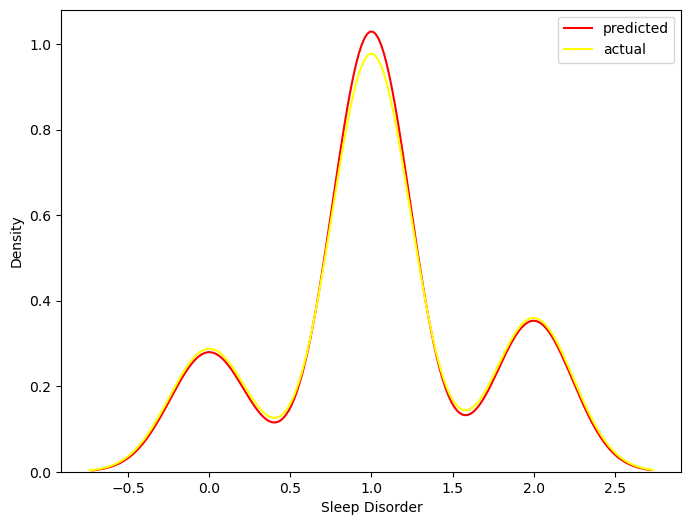

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
print(sns.kdeplot(y_pred1,color='red',label='predicted',ax=ax))
print(sns.kdeplot(y_test,color='yellow',label='actual',ax=ax))
plt.legend()
plt.show()

In [54]:
#Accuracy
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Classification_Report: ", classification_report(y_pred1,y_test))
print("Confusion_Matrix",confusion_matrix(y_pred1,y_test))

Accuracy:  0.9380530973451328
Classification_Report:                precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.96      0.93      0.94        70
           2       0.84      0.88      0.86        24

    accuracy                           0.90       113
   macro avg       0.87      0.88      0.87       113
weighted avg       0.91      0.90      0.90       113

Confusion_Matrix [[16  1  2]
 [ 3 65  2]
 [ 1  2 21]]


In [55]:
dtree = DecisionTreeClassifier()

In [56]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

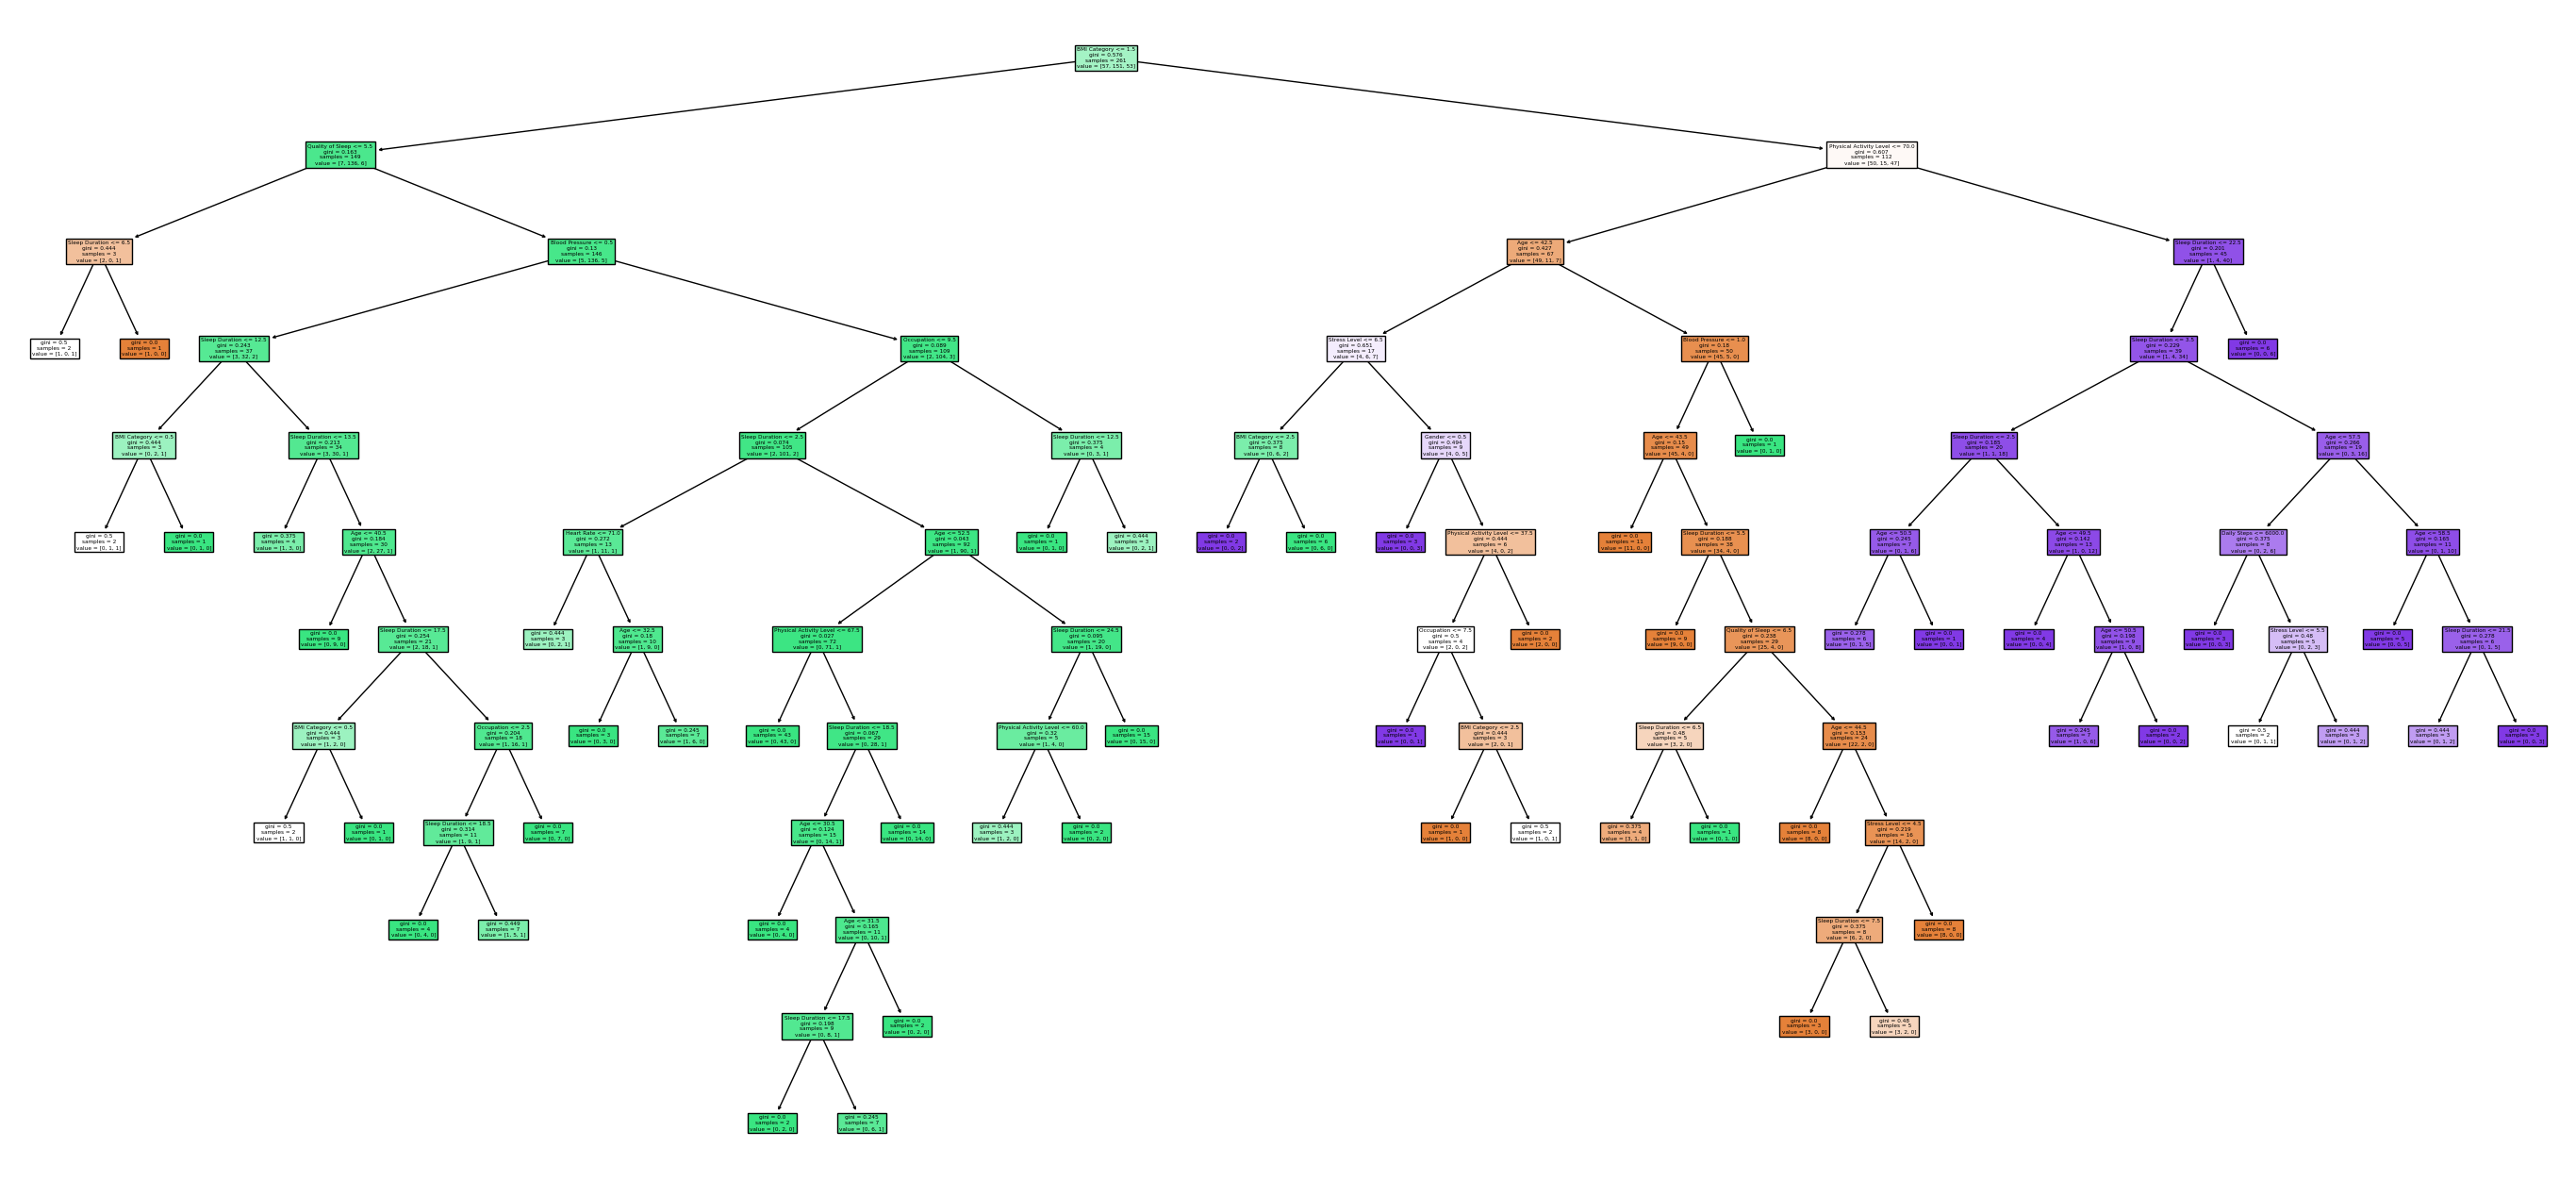

In [57]:
from sklearn import tree
plt.figure(figsize=(35,16))
tree.plot_tree(dtree,filled=True,feature_names=X_train.columns)
plt.show()

In [58]:
y_pred2 = dtree.predict(X_test)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


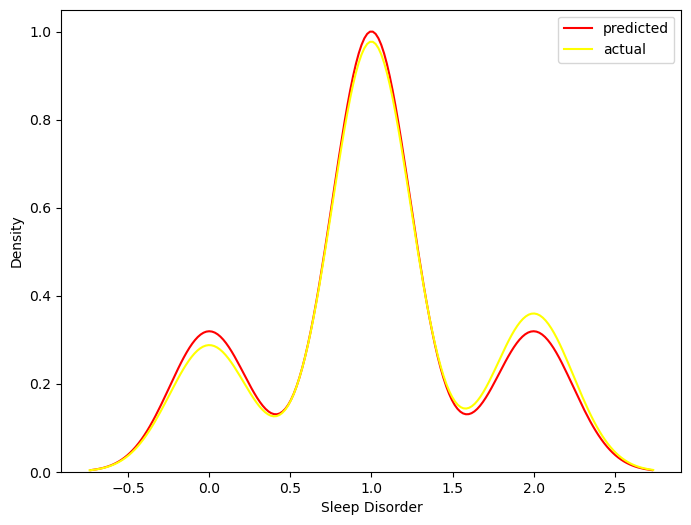

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
print(sns.kdeplot(y_pred2,color='red',label='predicted',ax=ax))
print(sns.kdeplot(y_test,color='yellow',label='actual',ax=ax))
plt.legend()
plt.show()

In [60]:
#Accuracy
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Classification_Report: ", classification_report(y_pred2,y_test))
print("Confusion_Matrix",confusion_matrix(y_pred2,y_test))

Accuracy:  0.9380530973451328
Classification_Report:                precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.96      0.94      0.95        69
           2       0.84      0.95      0.89        22

    accuracy                           0.92       113
   macro avg       0.90      0.90      0.90       113
weighted avg       0.92      0.92      0.92       113

Confusion_Matrix [[18  2  2]
 [ 2 65  2]
 [ 0  1 21]]


In [61]:

joblib.dump(lr,'sleeping_disorder_predict1')

['sleeping_disorder_predict1']

In [62]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [63]:
df = pd.DataFrame({
    'Gender':1,
    'Age':27,
    'Occupation':9,
    'Sleep Duration':3,
    'Quality of Sleep':6,
    'Physical Activity Level':42,
    'Stress Level':6,
    'BMI Category':3,
    'Blood Pressure':2,
    'Heart Rate':77,
    'Daily Steps':4200},index=[0])


In [64]:
model = joblib.load('sleeping_disorder_predict1')

In [65]:
result=model.predict(df)

In [66]:
result

array([1])

In [67]:
if result[0]== 0:
    print("INSOMNIA")
elif result[0] == 1:
    print("NORMAL:NO SLEEPING DISORDER")
else:
    print("SLEEP APNEA")

NORMAL:NO SLEEPING DISORDER


In [68]:
#Prediction on New Data: Method2
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get())
    p10=float(e10.get())
    p11=float(e11.get())
    
    Model1= joblib.load('sleeping_disorder_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Age':p2,
    'Occupation':p3,
    'Sleep Duration':p4,
    'Quality of Sleep':p5,
    'Physical Activity Level':p6,
    'Stress Level':p7,
    'BMI Category':p8,
    'Blood Pressure':p9,
    'Heart Rate':p10,
    'Daily Steps':p11

     
}, index=[0])
    result = Model1.predict(df)
    print(result)
    if result[0]== 0:
        Label(master, text="INSOMNIA").grid(row=12)
    elif result[0] == 1:
        Label(master, text="NORMAL:NO SLEEPING DISORDER").grid(row=12)
    else:
        Label(master, text="SLEEP APNEA").grid(row=12)
 
        
master = Tk()
master.title("SLEEPING DISORDER Prediction Using Machine Learning")


label = Label(master, text = "SLEEPING DISORDER Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Gender").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Occupation").grid(row=3)
Label(master, text="Sleep Duration").grid(row=4)
Label(master, text="Quality of Sleep").grid(row=5)
Label(master, text="Physical Activity Level").grid(row=6)
Label(master, text="Stress Level").grid(row=7)
Label(master, text="BMI Category").grid(row=8)
Label(master, text="Blood Pressure").grid(row=9)
Label(master, text="Heart Rate").grid(row=10)
Label(master, text="Daily Steps").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()